In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

In [2]:
# Import dataset
BASE_URL = "https://s3.eu-west-3.amazonaws.com/profession.ai/datasets/"
df = pd.read_csv(BASE_URL+"Filter_Toxic_Comments_dataset.csv")

# **EXPLORATIVE DATA ANALYSIS**


In this section we are going to perform an initial exploratory data analysis.

1. Checking the integrity of the data in the dataset, i.e. checking for null, missing or duplicate values.
2. Analysis of the frequency tables of values to check the distribution of the features
3. Checking the balance of the classes (number of sentences containing offence or not)
4. Analysis of sentence length statistics and verification of the presence of outliers in the corpus (particularly long texts).


In [3]:
df.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
def checking_function(df):
    """
    Check for null, duplicated, and NaN values.

    Args:
        df (pd.DataFrame): The dataframe to check.

    Returns:
        None
    """

    # check for null values
    if df.isnull().values.any():
        print("Null values present")
    else:
        print("No null values")

    # check for duplicated values
    if df.duplicated().values.any():
        print("Duplicated values present")
    else:
        print("No duplicated values")

    # check for missing values
    if df.isna().values.any():
        print("Missing values present")
    else:
        print("No missing values")

In [6]:
# check for missing values

checking_function(df)

No null values
No duplicated values
No missing values


In [7]:
def plot_bar(data, color='skyblue', figsize=(10, 6), xlabel='Labels', ylabel='Frequency',title = 'Plot Bar'):
    """
    Plot a bar plot.

    Args:
        data (pd.Series): The data for the bar plot.
        color (str, optional): The color of the bars. Defaults to 'skyblue'.
        figsize (tuple, optional): The figure size of the plot. Defaults to (10, 6).
        xlabel (str, optional): The label for the x-axis. Defaults to 'Labels'.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Frequency'.
    """

    sorted_data = data.sort_values(ascending=False)

    sns.set_palette("viridis")

    plt.figure(figsize=figsize)
    ax = sns.barplot(x=sorted_data.index, y=sorted_data.values, color=color)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [8]:
# Explore frequency and relative frequency tables
freq_table = df.iloc[:, 1:7].sum(axis=0)
rel_freq_table = (freq_table/freq_table.sum())*100

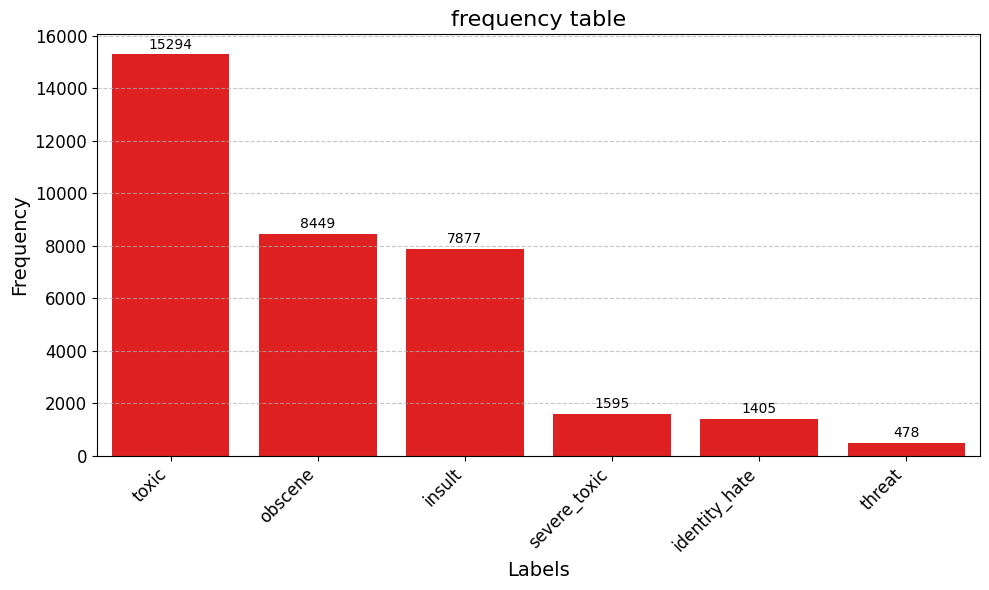

In [9]:
# plot a frequency table
plot_bar(freq_table, xlabel='Labels', ylabel='Frequency',title = 'frequency table',color = 'red')

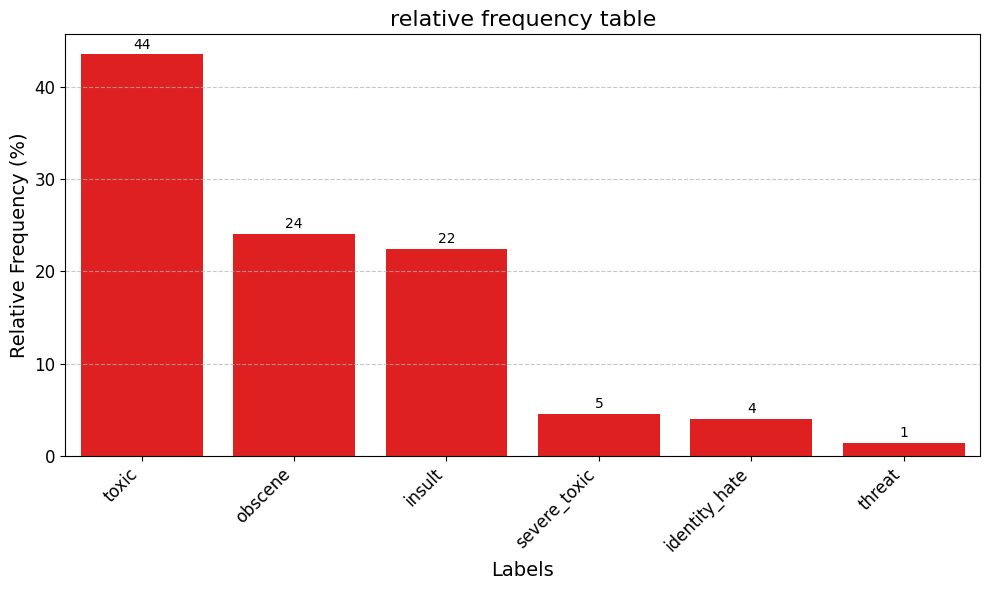

In [10]:
plot_bar(rel_freq_table, xlabel='Labels', ylabel='Relative Frequency (%)',title = 'relative frequency table',color = 'red')

### **Frequency tables**

We can see from the frequency table that the majority of the sentences contain toxic comments, followed by obscene and insult.

The less represented labels are sever_toxic,identity_hate and threat.

### **Relative frequency table**

From the relative frequency tables you can see that the last 3 labels all together represent only 10% of the total corpus

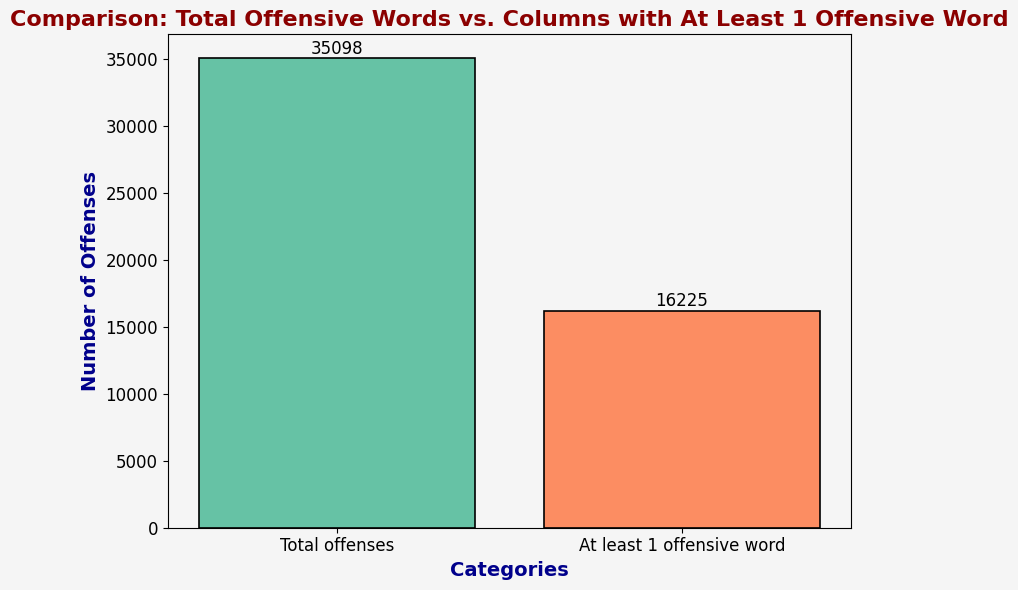

In [11]:
def plot_comparison_bar_chart(data, labels, title, xlabel, ylabel, colors=['#66c2a5', '#fc8d62']):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='#f5f5f5')

    bars = ax.bar(labels, data, color=colors, edgecolor='black', linewidth=1.2)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
                ha='center', va='bottom', fontsize=12, color='black')

    plt.title(title, fontsize=16, color='darkred', fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, color='darkblue', fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, color='darkblue', fontweight='bold')

    ax.tick_params(axis='both', labelsize=12, colors='black')
    ax.set_facecolor('#f5f5f5')

    plt.tight_layout()
    plt.show()

# Extracting relevant data from the DataFrame
offensive_words = df['sum_injurious'].sum()
offensive_per_column = df[df['sum_injurious'] > 0].shape[0]

# Creating data and labels for the bar chart
count = [offensive_words, offensive_per_column]
labels = ['Total offenses', 'At least 1 offensive word']

# Plotting the bar chart using the refactored function
plot_comparison_bar_chart(count, labels,
                          'Comparison: Total Offensive Words vs. Columns with At Least 1 Offensive Word',
                          'Categories', 'Number of Offenses')


In [12]:
# divide into clean and dirty sentences
clean_sentences = df[df.iloc[:, 1:7].sum(axis=1) == 0].shape[0]
dirty_sentences = df[df.iloc[:, 1:7].sum(axis=1) != 0].shape[0]
total_offenses = df['sum_injurious'].sum()

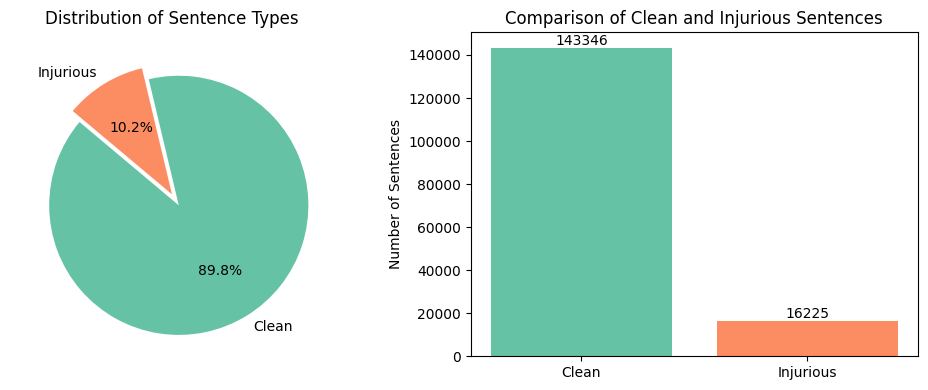

In [13]:
# Data for plotting
count = [clean_sentences, dirty_sentences]
labels = ['Clean', 'Injurious']
plt.figure(figsize=(10, 4))
# Plotting the pie chart
plt.subplot(1, 2, 1)
colors = ['#66c2a5', '#fc8d62']  # Custom colors for the pie chart
explode = (0.1, 0)  # To explode the 'Clean' slice slightly

plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title('Distribution of Sentence Types')

# Plotting the bar chart
plt.subplot(1, 2, 2)
plt.bar(labels, count, color=colors)

# Adding data labels on top of the bars
for i, value in enumerate(count):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Comparison of Clean and Injurious Sentences')
plt.ylabel('Number of Sentences')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
# Check if the sum_injurious column present any discrepancy in the sum of other labels

# Filter the DataFrame for rows where sum_injurious is 0
zero_injurious_df = df[df['sum_injurious'] == 0]

# Check if any of the other labels is 1 in the filtered DataFrame
mismatch_rows = zero_injurious_df[(zero_injurious_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == 1).any(axis=1)]

# Get the number of rows where there's a mismatch
mismatch_count = len(mismatch_rows)

print(f'Number of rows where sum_injurious is 0 but another label is 1: {mismatch_count}')

Number of rows where sum_injurious is 0 but another label is 1: 0


### **Class Imbalance**

* We can see that near 90% of the corpus is
composed of clean sentences and only the remaining 10% is composed of injurious sentences.
This highlights a concrete problem of class imbalance in the dataset.

* In contrast we can see that the total offenses present in the corpus amount to something like 35.000.
We have 35.000 offenses distributed on a total of 16.225 columns

In [15]:
# Check the average length of the sentences
average_sentences_length = df['comment_text'].str.len().mean()
print(f'Average length of sentences: {round(average_sentences_length,2)} characters')

Average length of sentences: 394.07 characters


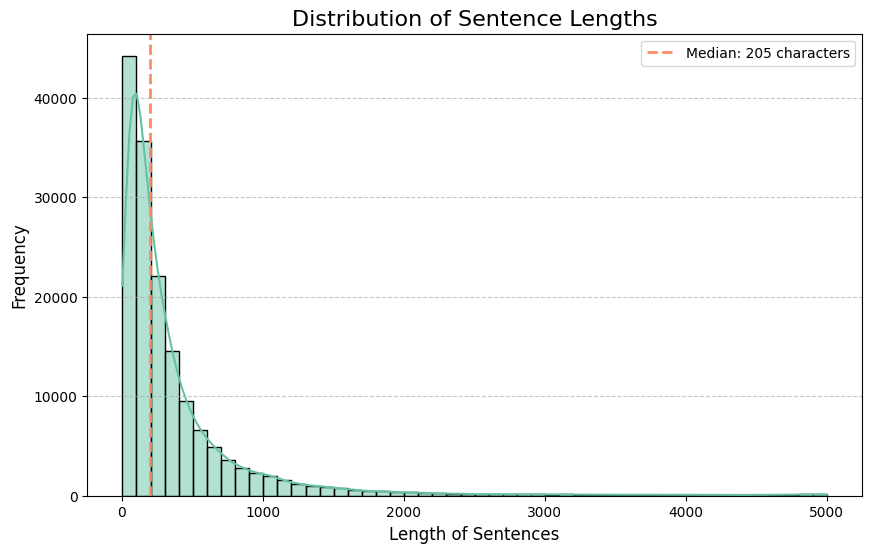

In [16]:
# Assuming 'comment_text' is the column containing sentences
lengths = df['comment_text'].str.len()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with KDE
sns.histplot(data = df,x = lengths, kde=True, color='#66c2a5', bins=50, ax=ax)

# Customize plot aesthetics
ax.set_title('Distribution of Sentence Lengths', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Add vertical lines for quartiles or other statistics if desired
ax.axvline(lengths.median(), color='#fc8d62', linestyle='dashed', linewidth=2,
           label=f"Median: {lengths.median():.0f} characters")
# Add legend if needed
ax.legend()

# Show the plot
plt.show()

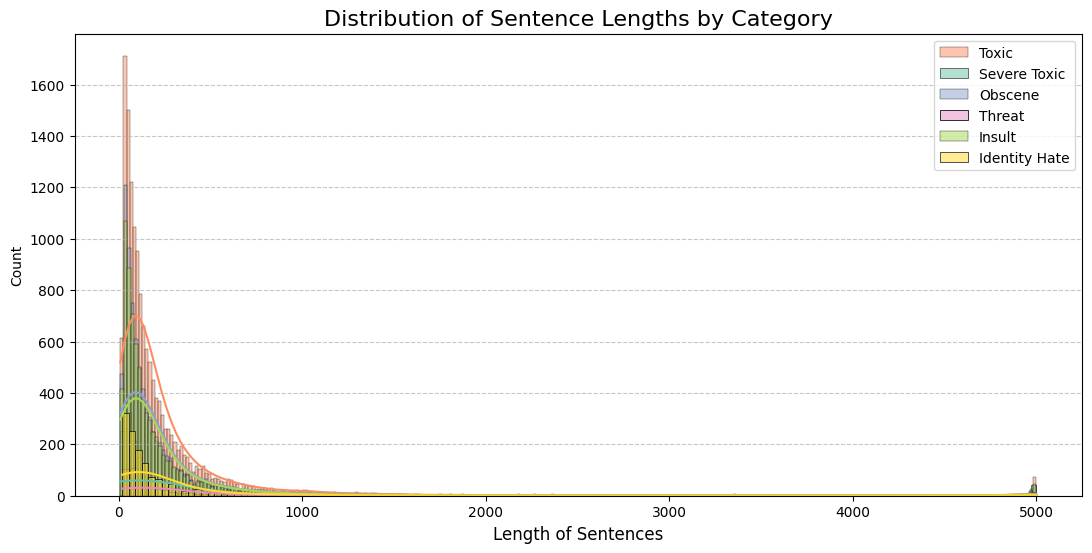

In [17]:
# Check the distribution of the sentences lengths for each category
toxic_lenghts = df[df['toxic'] == 1]['comment_text'].str.len()
severe_toxic_lenghts = df[df['severe_toxic'] == 1]['comment_text'].str.len()
obscene_lenghts = df[df['obscene'] == 1]['comment_text'].str.len()
threat_lenghts = df[df['threat'] == 1]['comment_text'].str.len()
insult_lenghts = df[df['insult'] == 1]['comment_text'].str.len()
identity_hate_lenghts = df[df['identity_hate'] == 1]['comment_text'].str.len()

# plot the distributions
fig, ax = plt.subplots(figsize=(13, 6))

sns.histplot(toxic_lenghts, color='#fc8d62', label='Toxic', ax=ax,kde=True)
sns.histplot(severe_toxic_lenghts, color='#66c2a5', label='Severe Toxic', ax=ax,kde=True)
sns.histplot(obscene_lenghts, color='#8da0cb', label='Obscene', ax=ax,kde=True)
sns.histplot(threat_lenghts, color='#e78ac3', label='Threat', ax=ax,kde=True)
sns.histplot(insult_lenghts, color='#a6d854', label='Insult', ax=ax,kde=True)
sns.histplot(identity_hate_lenghts, color='#ffd92f', label='Identity Hate', ax=ax,kde=True)

ax.set_title('Distribution of Sentence Lengths by Category', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.show()

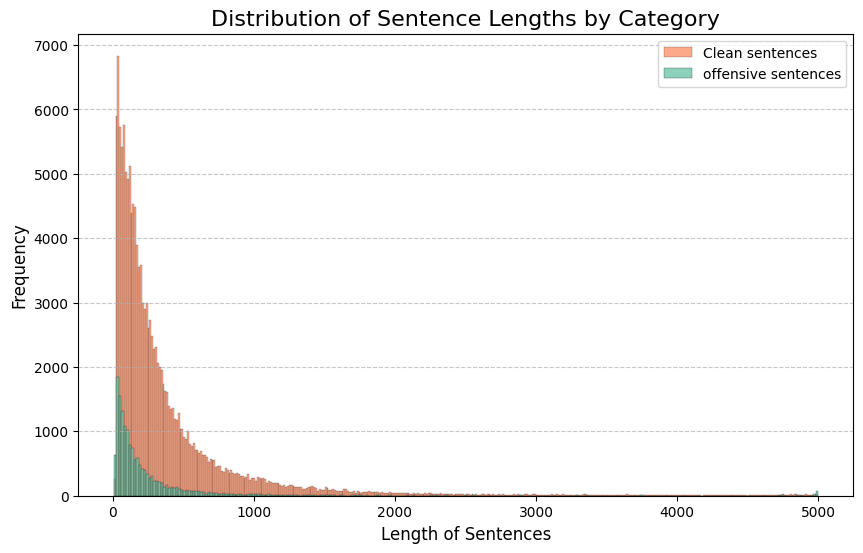

In [18]:
clean_sentences_lenght = df[df['sum_injurious'] == 0]['comment_text'].str.len()
dirty_sentences_lenght = df[df['sum_injurious'] != 0]['comment_text'].str.len()

# plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(clean_sentences_lenght, color='#fc8d62', label='Clean sentences', ax=ax)
sns.histplot(dirty_sentences_lenght, color='#66c2a5', label='offensive sentences', ax=ax)

ax.set_title('Distribution of Sentence Lengths by Category', fontsize=16)
ax.set_xlabel('Length of Sentences', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.show()

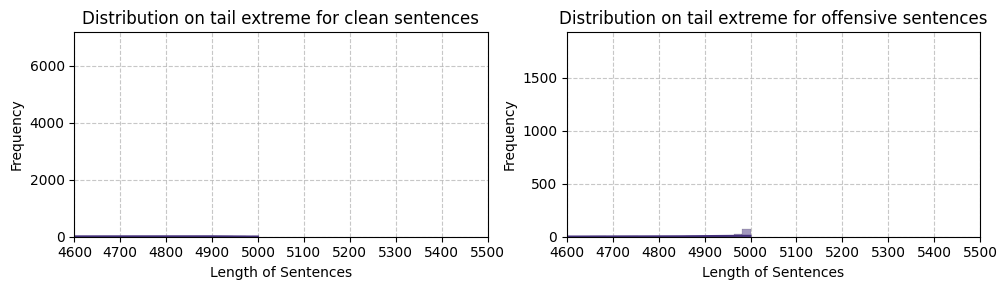

In [19]:
# Zoom out the extreme tail
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(df,x=clean_sentences_lenght, kde=True)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Distribution on tail extreme for clean sentences')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.xlim(4600,5500)

plt.subplot(1, 2, 2)
sns.histplot(df,x=dirty_sentences_lenght, kde=True)
plt.grid(linestyle='--', alpha=0.7)
plt.title('Distribution on tail extreme for offensive sentences')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
# set the max length for dirty sentences
plt.xlim(4600,5500)
plt.tight_layout()
plt.show()

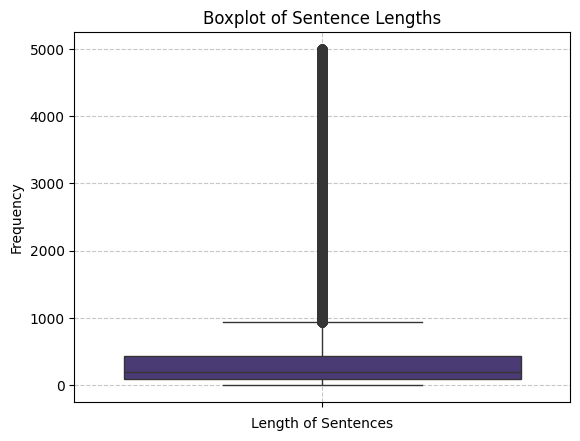

In [20]:
# use a boxplot to visualize the distribution of sentence lengths
sns.boxplot(data = df,y=df['comment_text'].str.len())
plt.grid(linestyle='--', alpha=0.7)
plt.title('Boxplot of Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.show()

In [21]:
# check the max and min lengths
max_length = df['comment_text'].str.len().max()
min_length = df['comment_text'].str.len().min()

print(f"Maximum sentence length: {max_length} characters")
print(f"Minimum sentence length: {min_length} characters")

Maximum sentence length: 5000 characters
Minimum sentence length: 6 characters


In [22]:
# check the average length for clean sentences and for dirty sentences
avg_clean_length = df[df['sum_injurious'] == 0]['comment_text'].str.len().mean()
avg_dirty_length = df[df['sum_injurious'] != 0]['comment_text'].str.len().mean()

print(f"Average length of clean sentences: {round(avg_clean_length)} characters")
print(f"Average length of dirty sentences: {round(avg_dirty_length)} characters")

Average length of clean sentences: 404 characters
Average length of dirty sentences: 303 characters


### **Analysis of sentence lengths distributions**

- To measure the central tendency in that case we used the median for it's quality to be more robust with skewed distributions.
You can see that the median value is around 205 characters for the sentences length.

- It can be seen that the length of most sentences in the corpus is between 6 and 1,000 characters.
It can also be seen from both the histograms and the boxplot how there are some extremely long sentences that reach up to 5000 characters.
It can be seen from the histograms and especially from the boxplot how these outliers are a little bit more present in the corpus containing the offending sentences.
In any case, it will be necessary to take into account the presence of these sentences with such anomalous length and process them appropriately later.

- Another interesting fact is that the average length for clean sentences is higher than the average length for dirty sentences.

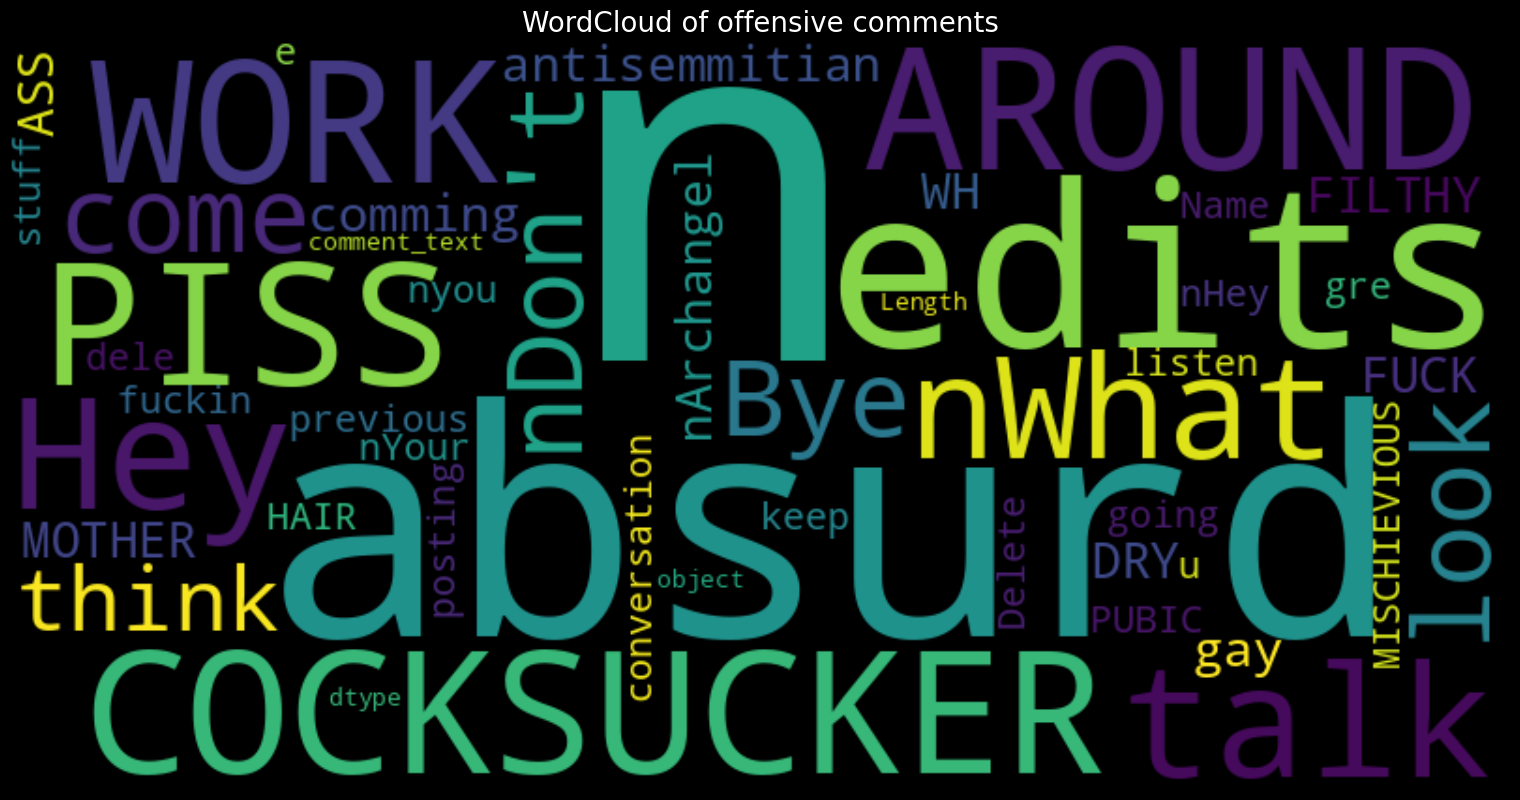

In [23]:
# Assuming 'comment_text' is the column containing sentences and 'toxic' is the label for toxic comments
toxic_comments = df[df['sum_injurious'] != 0]['comment_text']
# Create and generate a WordCloud image with toxic comments
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Change background color to white for better visibility
    stopwords=STOPWORDS,
    max_words=200,
    colormap='viridis',
    contour_color='#4B778D',  # Petroleum blue
    contour_width=2,
).generate(str(toxic_comments))

# Display the generated image
fig, ax = plt.subplots(figsize=(15, 8), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Add a title
plt.title('WordCloud of offensive comments', fontsize=20, color='white')

# Adjust layout for better spacing
plt.tight_layout(pad=0)

# Show the plot
plt.show()


## **Overall summary of the exploratory analysis:**

- Most of the offensive phrases fall within the comments defined as "toxic."
- The last 3 labels of the total 6 cover just 10% of the total dataset
- The dataset is highly unbalanced as the number of clean sentences in the corpus accounts for 90% of the dataset versus just 10% of the offensive sentences.
- Some sentences with an abnormal length are present thus determining the presence of some outliers.

# **STEP 2: PREPROCESSING**

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load and download necessary libraries
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
def preprocess_text(corpus):
    """
    Preprocesses a text corpus using various text cleaning techniques.

    Parameters:
    - corpus (str): The input text corpus to be preprocessed.

    Returns:
    - str: Preprocessed text from the input corpus.
    """
    # Remove URLs
    corpus = re.sub(r'http\S+', '', corpus)
    # Lowercasing
    corpus = corpus.lower()
    # Remove punctuations
    corpus = re.sub(r'[^\w\s]', '', corpus)
    # Remove stopwords
    corpus = ' '.join([word for word in corpus.split() if word not in stopwords])
    # Lemmatization
    corpus = ' '.join([lemmatizer.lemmatize(word) for word in corpus.split()])
    # Remove HTML tags
    corpus = re.sub(r'<.*?>', '', corpus)
    # Remove numbers
    corpus = re.sub(r'\d+', '', corpus)
    # Remove extra spaces
    corpus = re.sub(r'\s+', ' ', corpus).strip()

    return corpus


In [26]:
prep_data = df.copy()

In [27]:
prep_data['comment_text'] = prep_data['comment_text'].apply(preprocess_text)

In [28]:
# check the average number of tokens
avg_tokens = prep_data['comment_text'].str.len().mean()
median_tokens = prep_data['comment_text'].str.len().median()

print(f"Average number of tokens: {round(avg_tokens)}")
print(f"Median number of tokens: {round(median_tokens)}")

Average number of tokens: 245
Median number of tokens: 125


<Axes: ylabel='comment_text'>

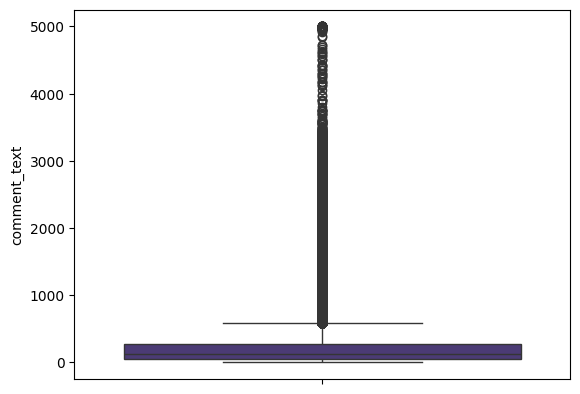

In [29]:
sns.boxplot(data = prep_data,y=prep_data['comment_text'].str.len())

# **STEP 3: PREPARING DATA FOR MODELING**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [31]:
# define the vectorizer
VOCAB_SIZE = 10000
vectorizer = TfidfVectorizer(max_features=VOCAB_SIZE)

In [32]:
# Divide data into train and validation
X = prep_data[['comment_text','sum_injurious']]
y = prep_data[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [33]:
X_train,X_val,y_train,y_val = train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42)

_, X_test, _, y_test = train_test_split(X_val,y_val,
                                        test_size=0.1,
                                        random_state=42)

In [34]:
# Count all the % for all occurence in the labels

# Count all the % for all occurence in the labels
train_labels = y_train.columns
val_labels = y_val.columns
test_labels = y_test.columns

# make a dict with all the percentages
train_perc = {}
val_perc = {}
test_perc = {}
for label in train_labels:
    train_perc[label] = y_train[label].sum() / len(y_train) * 100
    val_perc[label] = y_val[label].sum() / len(y_val) * 100
    test_perc[label] = y_test[label].sum() / len(y_test) * 100

# print the results
print("LABELS PRESENCE IN TRAIN SET (in %):")
for label, perc in train_perc.items():
    print(f"{label}: {perc:.2f}%")

print("\nLABELS PRESENCE IN VALIDATION SET (in %):")
for label, perc in val_perc.items():
    print(f"{label}: {perc:.2f}%")

print("\nLABELS PRESENCE IN TEST SET (in %):")
for label, perc in test_perc.items():
    print(f"{label}: {perc:.2f}%")


LABELS PRESENCE IN TRAIN SET (in %):
toxic: 9.59%
severe_toxic: 0.99%
obscene: 5.28%
threat: 0.31%
insult: 4.91%
identity_hate: 0.87%

LABELS PRESENCE IN VALIDATION SET (in %):
toxic: 9.57%
severe_toxic: 1.02%
obscene: 5.34%
threat: 0.28%
insult: 4.99%
identity_hate: 0.90%

LABELS PRESENCE IN TEST SET (in %):
toxic: 8.54%
severe_toxic: 1.11%
obscene: 5.05%
threat: 0.15%
insult: 4.97%
identity_hate: 0.94%


# Here we train a Naive model using a Logistic regression with a ClassifierChain to handle multi-label classification

In [35]:
from sklearn.multioutput import ClassifierChain
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# METRICS
from sklearn.metrics import (multilabel_confusion_matrix,
                             classification_report,
                             hamming_loss)

In [36]:
# Define a function to plot Confusion matrix for multi-label classification

def plot_multilabel_confusion_matrix(mcm, labels, title,normalize=False):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)

    for i, (label, matrix) in enumerate(zip(labels, mcm)):
        row = i // 3
        col = i % 3

        if normalize:
            matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(matrix, ax=axes[row, col], annot=True, fmt=".2f",cmap="YlGnBu", linewidths=.5)
        else:

            sns.heatmap(matrix, ax=axes[row, col], annot=True, fmt="d",cmap="YlGnBu", linewidths=.5)

        axes[row, col].set_title(label, fontsize=12)
        axes[row, col].set_xlabel('Predicted', fontsize=10)
        axes[row, col].set_ylabel('Actual', fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

    plt.show()

labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']

In [37]:
# define a naive model
naive_clf = ClassifierChain(LogisticRegression(solver='newton-cg'),
                            order='random',
                            random_state=42,
                            cv = 5)

# Define a naive pipeline
preprocessor = ColumnTransformer([
    ('tfidf', vectorizer, 'comment_text'),
    ('pass', 'passthrough', ['sum_injurious'])
])

naive_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', naive_clf)
])

In [38]:
naive_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=10000),
                                                  'comment_text'),
                                                 ('pass', 'passthrough',
                                                  ['sum_injurious'])])),
                ('clf',
                 ClassifierChain(base_estimator=LogisticRegression(solver='newton-cg'),
                                 cv=5, order='random', random_state=42))])

In [39]:
naive_preds = naive_pipeline.predict(X_val)

In [40]:
# Show the hamming loss
print(f"Hamming loss: {hamming_loss(y_val, naive_preds):.3f}")

Hamming loss: 0.005


In [41]:
print(classification_report(y_val, naive_preds,
                            zero_division=1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4582
           1       0.80      0.69      0.74       486
           2       0.96      0.93      0.94      2556
           3       0.82      0.35      0.49       136
           4       0.92      0.91      0.92      2389
           5       0.90      0.53      0.67       432

   micro avg       0.93      0.92      0.93     10581
   macro avg       0.89      0.73      0.79     10581
weighted avg       0.93      0.92      0.92     10581
 samples avg       0.99      0.99      0.99     10581



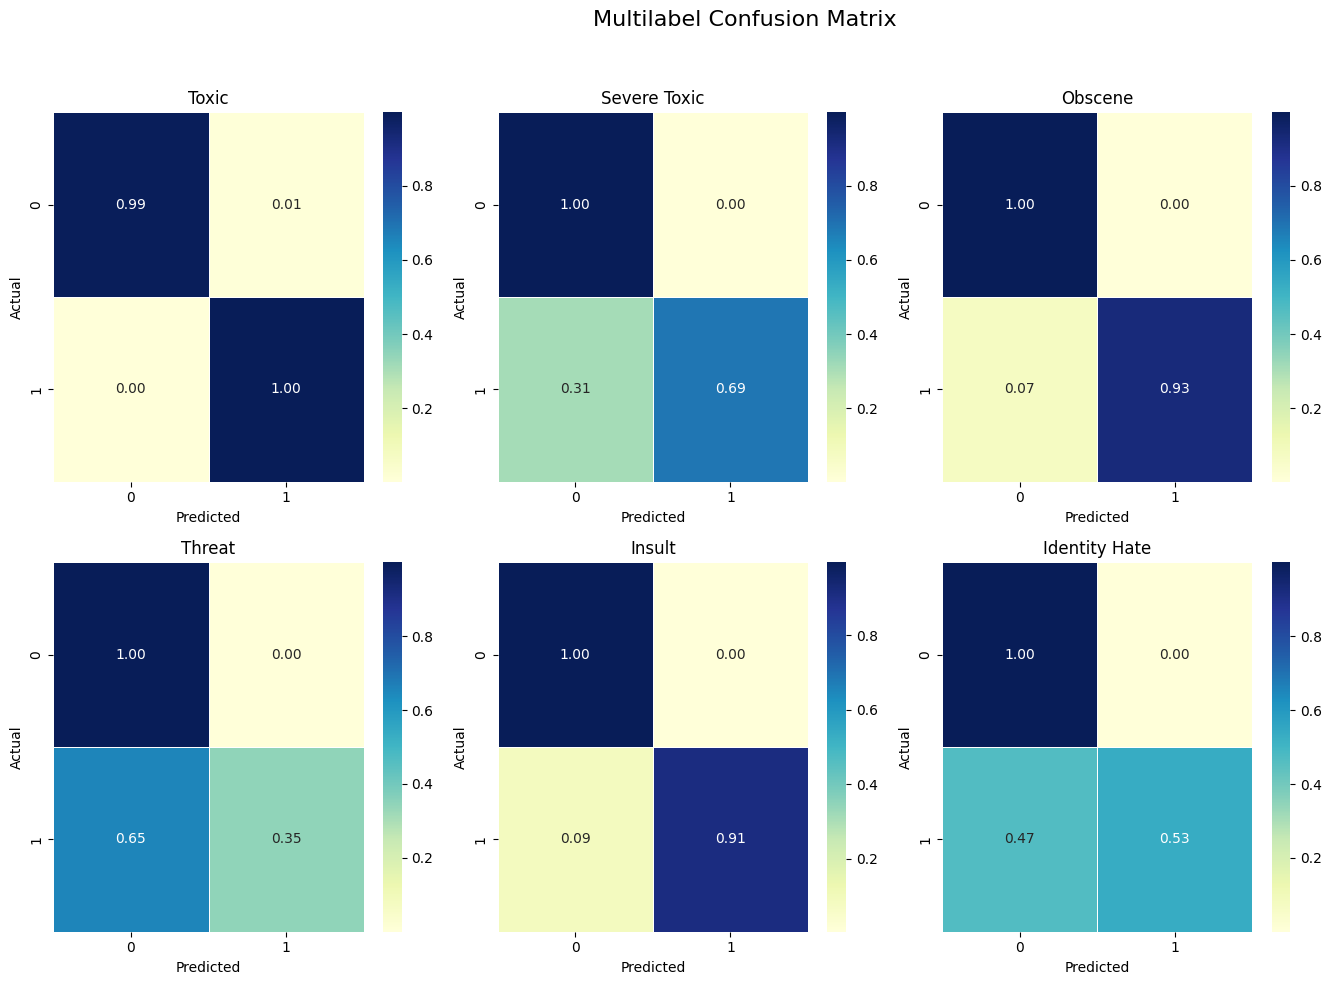

In [42]:
mcm = multilabel_confusion_matrix(y_val, naive_preds)

# plot the matrix
plot_multilabel_confusion_matrix(mcm, labels, 'Multilabel Confusion Matrix', normalize=True)


In [43]:
test_preds = naive_pipeline.predict(X_test)

In [44]:
print(classification_report(y_test, test_preds,
                            target_names=labels,
                            zero_division=1))

               precision    recall  f1-score   support

        Toxic       0.91      1.00      0.95       409
 Severe Toxic       0.81      0.66      0.73        53
      Obscene       0.97      0.94      0.95       242
       Threat       0.50      0.14      0.22         7
       Insult       0.95      0.88      0.91       238
Identity Hate       0.83      0.44      0.58        45

    micro avg       0.93      0.91      0.92       994
    macro avg       0.83      0.68      0.73       994
 weighted avg       0.92      0.91      0.91       994
  samples avg       0.99      0.99      0.99       994



# **REPORT FOR THE NAIVE MODEL**

The model overall despite its simplicity succeeded very well in identifying the labels most represented in the dataset bringing home some pretty good results overall.
The hamming loss is also very low.

In spite of this it can be seen immediately from the confusion matrices how the model struggles to correctly identify the 3 least represented labels **['severe_toxic',identity_hate','threat']**

You can see also from the classification report that the most underrepresented label *threat* get the worst metrics.

# Test Naive model with **UPDATED WEIGHTS**

- Here we do the same thing above but this time trying to use custom weights for each label based on their frequency

In [45]:
# calculate frequency of the labels
frequency = {label: round(y_train[label].sum()/len(y_train)*100,2) for label in y_train.columns}

# define weights
weights = {
    0: 1/frequency['toxic'],
    1: 1/frequency['severe_toxic'],
    2: 1/frequency['obscene'],
    3: 1/frequency['threat'],
    4: 1/frequency['insult'],
    5: 1/frequency['identity_hate']
    }
weights

{0: 0.10427528675703858,
 1: 1.0101010101010102,
 2: 0.1893939393939394,
 3: 3.2258064516129035,
 4: 0.20366598778004072,
 5: 1.1494252873563218}

In [46]:
# define a naive model
naive_weighted = ClassifierChain(LogisticRegression(solver='newton-cg',class_weight=weights),
                            order='random',
                            random_state=42,
                            cv = 5)

# Define a naive pipeline
preprocessor = ColumnTransformer([
    ('tfidf', vectorizer, 'comment_text'),
    ('pass', 'passthrough', ['sum_injurious'])
])

weighted_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', naive_weighted)
])

In [47]:
weighted_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=10000),
                                                  'comment_text'),
                                                 ('pass', 'passthrough',
                                                  ['sum_injurious'])])),
                ('clf',
                 ClassifierChain(base_estimator=LogisticRegression(class_weight={0: 0.10427528675703858,
                                                                                 1: 1.0101010101010102,
                                                                                 2: 0.1893939393939394,
                                                                                 3: 3.2258064516129035,
                                                                                 4: 0.20366598778004072,
                                                                                 5: 1.1494252873563218},
                                                                   solver='newton-cg'),
                                 cv=5, order='random', random_state=42))])

In [48]:
weighted_preds = weighted_pipeline.predict(X_val)

In [49]:
# Show the hamming loss
print(f"Hamming loss: {hamming_loss(y_val, weighted_preds):.3f}")

Hamming loss: 0.009


In [50]:
print(classification_report(y_val, weighted_preds,
                            zero_division=1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4582
           1       0.56      0.88      0.68       486
           2       0.82      0.97      0.89      2556
           3       0.49      0.70      0.58       136
           4       0.77      0.96      0.86      2389
           5       0.51      0.84      0.63       432

   micro avg       0.82      0.97      0.89     10581
   macro avg       0.68      0.89      0.77     10581
weighted avg       0.83      0.97      0.89     10581
 samples avg       0.98      0.99      0.99     10581



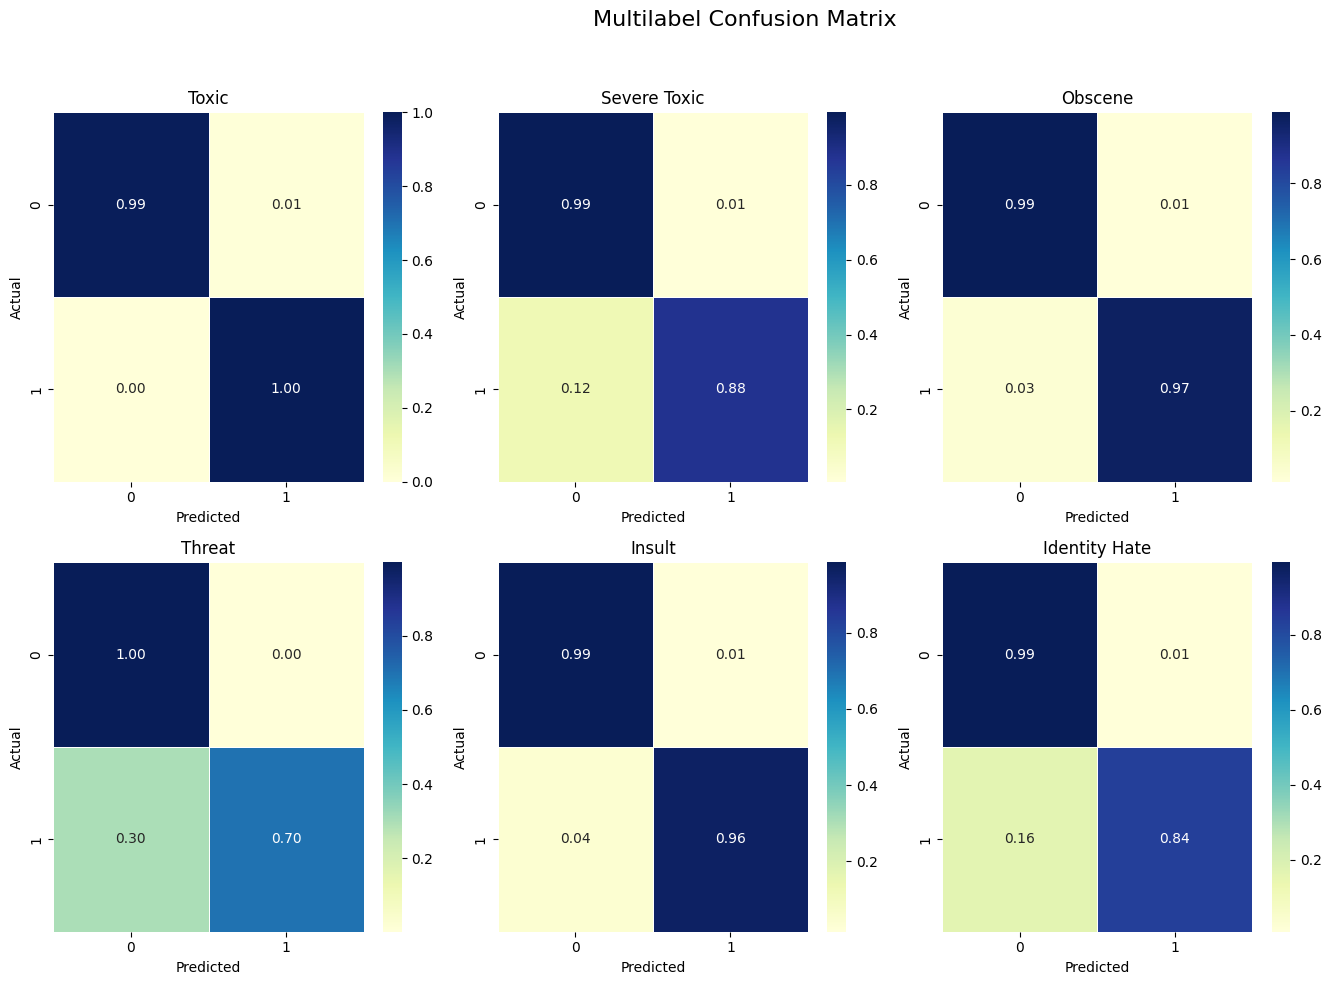

In [51]:
mcm = multilabel_confusion_matrix(y_val, weighted_preds)

# plot the matrix
plot_multilabel_confusion_matrix(mcm, labels, 'Multilabel Confusion Matrix', normalize=True)


In [52]:
test_preds = weighted_pipeline.predict(X_test)

In [53]:
print(classification_report(y_test, test_preds,
                            target_names=labels,
                            zero_division=1))

               precision    recall  f1-score   support

        Toxic       0.91      1.00      0.95       409
 Severe Toxic       0.65      0.94      0.77        53
      Obscene       0.83      0.97      0.89       242
       Threat       0.33      0.57      0.42         7
       Insult       0.80      0.93      0.86       238
Identity Hate       0.48      0.76      0.59        45

    micro avg       0.82      0.96      0.88       994
    macro avg       0.67      0.86      0.75       994
 weighted avg       0.83      0.96      0.89       994
  samples avg       0.98      0.99      0.99       994



# **REPORT FOR THE NAIVE MODEL WITH UPDATED WEIGHTS**

Now you can see from the confusion matrix that we got less false positives and the metrics for the *threat* label in the classification report are improved!

# Using Deep Learning

### TRAIN A RNN MODEL



In [79]:
# IMPORTS
import tensorflow as tf
from tensorflow.keras.layers import (Dense,Embedding,
                                     TextVectorization,
                                     Flatten,
                                     LSTM,
                                     Bidirectional,
                                     Input)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall,F1Score,AUC
from tensorflow.keras.metrics import FalsePositives, FalseNegatives,TruePositives, TrueNegatives
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
# Divide data into features and labels
train_sentences = df['comment_text'].to_numpy()
labels = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].to_numpy().astype(float)

In [82]:
MAX_LENGTH = 125 # The median value for length of comment text after preprocessing
VOCAB_SIZE = 10000

In [83]:
# Define the vectorization layer
Text_vectorizer = TextVectorization(max_tokens=VOCAB_SIZE,
                                    output_mode='int',
                                    output_sequence_length=MAX_LENGTH,
                                    pad_to_max_tokens=True,
                                    name='text_vectorizer',
                                    standardize = 'lower_and_strip_punctuation',
                                    split = 'whitespace')

Text_vectorizer.adapt(train_sentences)

In [84]:
# Optimize the dataset
train_set = tf.data.Dataset.from_tensor_slices((train_sentences,labels))
train_set = train_set.batch(16).prefetch(tf.data.AUTOTUNE).shuffle(1000)

In [85]:
# split the data into train,validation and test set
training = train_set.take(int(len(train_set)*.9))
validation = train_set.skip(int(len(train_set)*.7)).take(int(len(train_set)*.05))
testing = train_set.skip(int(len(train_set)*.9)).take(int(len(train_set)*.05))


In [86]:
len(training),len(validation),len(testing)

(8976, 498, 498)

In [87]:
# Define the embedding layer
embedding_layer = Embedding(input_dim=VOCAB_SIZE+1,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            input_length=MAX_LENGTH,
                            name='embedding_layer')

In [88]:
# Build the model
model_input = Input(shape=(1,), dtype='string', name='input_layer')

x = Text_vectorizer(model_input)

x = embedding_layer(x)

x = Bidirectional(LSTM(24,activation = 'tanh'))(x)

x = Dense(16, activation='relu')(x)

x = Dense(8, activation='relu')(x)

x = Flatten()(x)

model_output = Dense(6, activation='sigmoid')(x)

Net = Model(model_input, model_output)

In [89]:
Net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorizer (TextVecto  (None, 125)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding  (None, 125, 128)          1280128   
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 48)                29376     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                784       
                                                             

In [91]:
# Define the metrics to check during train
METRICS = [
    Recall(name='recall'),
    F1Score(name='f1_score',
            average='weighted', # use weighted average to account for labels imbalance
            threshold=0.5),

    FalsePositives(name='false_positives'),
    FalseNegatives(name='false_negatives'),
    TruePositives(name='true_positives'),
    TrueNegatives(name='true_negatives'),
    Precision(name='precision'),

    AUC(name='prc',
        multi_label=True,
        num_labels=6,
        curve='PR')
]

In [92]:
# Use a custom early stopping taken from Angel Igareta github to monitor multiple metrics
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    """
    Custom Early Stopping callback to monitor multiple metrics by combining them using a harmonic mean calculation.
    Adapted from (TensorFlow EarlyStopping source)[https://github.com/tensorflow/tensorflow/blob/v2.5.0/tensorflow/python/keras/callbacks.py#L1683-L1823].
    Author: Angel Igareta (angel@igareta.com)
    """
    def __init__(
        self,
        metrics_names=["loss"],
        mode="min",
        patience=0,
        restore_weights=False,
        logdir=None,
    ):
        super(CustomEarlyStopping, self).__init__()
        self.metrics_names = metrics_names
        self.mode = mode
        self.patience = patience
        self.restore_weights = restore_weights
        self.logdir = logdir
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best_combined_metric = np.Inf if self.mode == "min" else -np.Inf

    def on_epoch_end(self, epoch, logs=None):
        metrics = [logs.get(name) for name in self.metrics_names]
        metrics = tf.cast(metrics, dtype=tf.float32)
        metrics_count = tf.cast(tf.size(metrics), dtype=tf.float32)

        # Combined metric is the harmonic mean of the metrics_names.
        combined_metric = tf.math.divide(
            metrics_count, tf.math.reduce_sum(tf.math.reciprocal_no_nan(metrics))
        )

        # Specify logdir if you want to log the combined metric
        if self.logdir:
            with tf.summary.create_file_writer(self.logdir).as_default():
                tf.summary.scalar("combined_metric", data=combined_metric, step=epoch)

        # If harmonic mean is np.greater or np.less depending on min-max mode.
        if (
            self.mode == "min" and np.less(combined_metric, self.best_combined_metric)
        ) or (
            self.mode == "max"
            and np.greater(combined_metric, self.best_combined_metric)
        ):
            self.best_combined_metric = combined_metric
            self.wait = 0
            # Record the best weights if current results is better.
            self.best_weights = self.model.get_weights()
        else:
            self.wait = 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True

                # Restoring model weights from the end of the best epoch
                if self.restore_weights:
                    self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


# Use as an standard Keras callback
early_stopping_callback = CustomEarlyStopping(
    metrics_names=["val_f1_score", "val_prc"],
    mode="max",
    patience=3,
    restore_weights=True)

In [93]:
# Compile

Net.compile(loss='BinaryCrossentropy',
            optimizer=Adam(),
            metrics=METRICS)

In [108]:
# Fit
## The model was trained for about another 40 epochs before form a total of 46 epochs of training ##
history = Net.fit(training,
                  epochs=6,
                  validation_data=(validation),
                  validation_steps=int(0.25 * len(validation)), # validate on 25% of the data to speed up the process
                  class_weight = weights, # use the same weights used with the naive model
                  callbacks=[early_stopping_callback])

Epoch 1/6
8976/8976 [==============================] - 139s 15ms/step - loss: 7.0529e-04 - recall: 0.9682 - f1_score: 0.9706 - false_positives: 842.0000 - false_negatives: 1002.0000 - true_positives: 30506.0000 - true_negatives: 829346.0000 - precision: 0.9731 - prc: 0.9789 - val_loss: 0.0058 - val_recall: 0.9652 - val_f1_score: 0.9665 - val_false_positives: 13.0000 - val_false_negatives: 14.0000 - val_true_positives: 388.0000 - val_true_negatives: 11489.0000 - val_precision: 0.9676 - val_prc: 0.9772
Epoch 2/6
8976/8976 [==============================] - 139s 15ms/step - loss: 6.6044e-04 - recall: 0.9693 - f1_score: 0.9716 - false_positives: 815.0000 - false_negatives: 975.0000 - true_positives: 30744.0000 - true_negatives: 829162.0000 - precision: 0.9742 - prc: 0.9765 - val_loss: 0.0062 - val_recall: 0.9807 - val_f1_score: 0.9648 - val_false_positives: 22.0000 - val_false_negatives: 8.0000 - val_true_positives: 406.0000 - val_true_negatives: 11468.0000 - val_precision: 0.9486 - val_pr

In [147]:
# Save model weights

Net_weights = Net.save_weights('/content/drive/MyDrive/Net_weights')

In [148]:
loaded_weights = Net.load_weights('/content/drive/MyDrive/Net_weights')

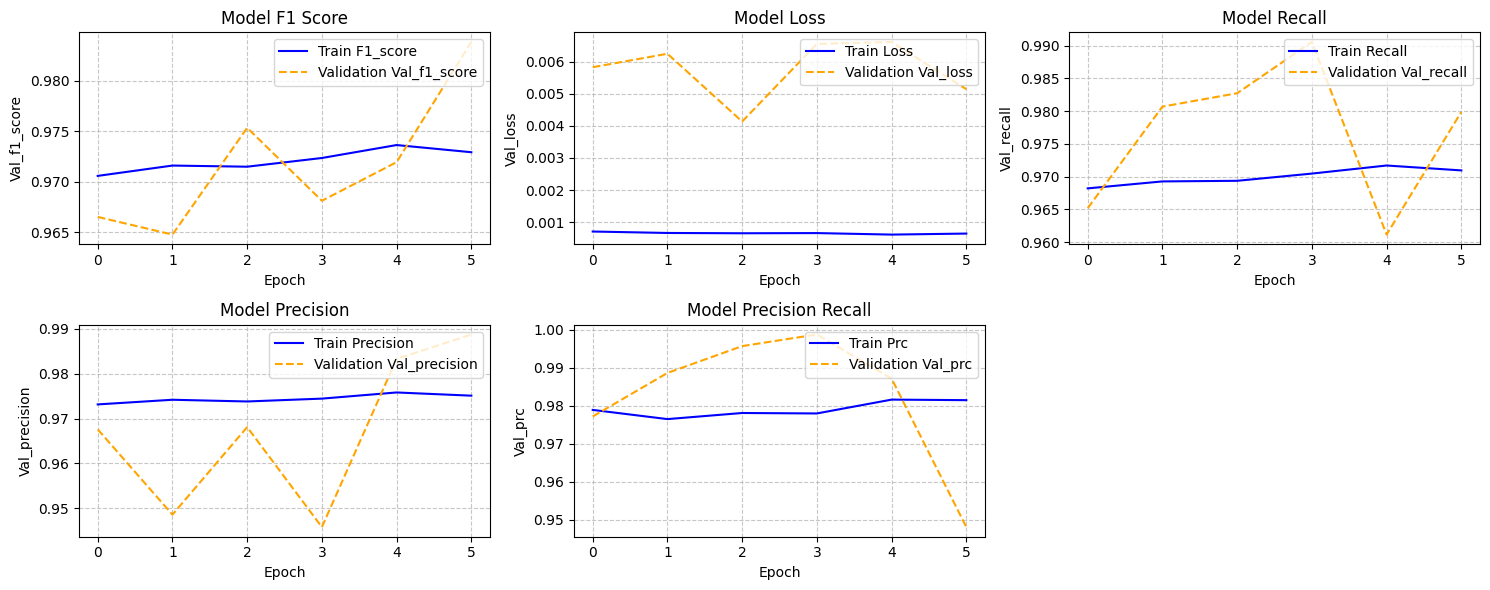

In [127]:
# Plot the curves (the plot shows only the last 6 epochs but the model was trained for about 40 epochs before)
plt.figure(figsize=(15, 6))

# Define metrics to plot
metrics_to_plot = ['f1_score',
                   'val_f1_score',

                   'loss',
                   'val_loss',

                   'recall',
                   'val_recall',

                   'precision',
                   'val_precision',

                   'prc',
                   'val_prc']

subplot_titles = ['Model F1 Score',
                  'Model Loss',
                  'Model Recall',
                  'Model Precision',
                  'Model Precision Recall']

for i in range(5):
    plt.subplot(2, 3, i+1)  # Use 5 rows, 1 column, and set the i+1-th subplot
    metric_train = metrics_to_plot[i * 2]
    metric_val = metrics_to_plot[i * 2 + 1]

    plt.plot(history.history[metric_train], label=f'Train {metric_train.capitalize()}', color='blue', linestyle='solid')
    plt.plot(history.history[metric_val], label=f'Validation {metric_val.capitalize()}', color='orange', linestyle='dashed')

    plt.title(subplot_titles[i])
    plt.xlabel('Epoch')
    plt.ylabel(metric_val.capitalize())
    plt.legend(loc='upper right')  # Adjust legend position as needed
    plt.grid(True, which='both', alpha=0.7, linestyle='dashed')

plt.tight_layout()
plt.show()


In [110]:
validation_result = Net.evaluate(validation)

498/498 [==============================] - 5s 10ms/step - loss: 0.0052 - recall: 0.9732 - f1_score: 0.9759 - false_positives: 36.0000 - false_negatives: 47.0000 - true_positives: 1706.0000 - true_negatives: 46019.0000 - precision: 0.9793 - prc: 0.9859


In [111]:
testing_result = Net.evaluate(testing)

498/498 [==============================] - 4s 8ms/step - loss: 0.0192 - recall: 0.9197 - f1_score: 0.9245 - false_positives: 118.0000 - false_negatives: 138.0000 - true_positives: 1581.0000 - true_negatives: 45971.0000 - precision: 0.9305 - prc: 0.8723


In [112]:
for name,metric  in zip(Net.metrics_names,validation_result):
    print(f'{name} : {metric}')

loss : 0.005217773374170065
recall : 0.9731888175010681
f1_score : 0.9759416580200195
false_positives : 36.0
false_negatives : 47.0
true_positives : 1706.0
true_negatives : 46019.0
precision : 0.9793341159820557
prc : 0.9859313368797302


In [113]:
for name,metric in zip(Net.metrics_names,testing_result):
    print(f'{name} : {metric}')

loss : 0.019197266548871994
recall : 0.9197207689285278
f1_score : 0.9245027303695679
false_positives : 118.0
false_negatives : 138.0
true_positives : 1581.0
true_negatives : 45971.0
precision : 0.9305473566055298
prc : 0.8722813725471497


In [114]:
def prediction(text):
    pred = np.where(Net.predict(text) > 0.5, 1, 0)

    predicted_indices = [i for i, value in enumerate(pred[0]) if value == 1]
    predicted_labels = [label_names[index] for index in predicted_indices]

    print(f"Original text: {text}")
    print(f" Predictions: {pred}")
    print(f"Predicted labels: {predicted_labels}")

In [115]:
label_names = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [141]:
dirty_text =["I'll smash your stupid head with a sledgehammer"]
dirty_text2 = ['I am going to kill you, nigger.']

In [142]:
prediction(dirty_text), prediction(dirty_text2)

1/1 [==============================] - 0s 42ms/step
Original text: ["I'll smash your stupid head with a sledgehammer"]
 Predictions: [[1 0 0 1 0 0]]
Predicted labels: ['toxic', 'threat']
1/1 [==============================] - 0s 32ms/step
Original text: ['I am going to kill you, nigger.']
 Predictions: [[1 0 1 1 1 1]]
Predicted labels: ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']


(None, None)

In [118]:
clean_text = ['The best way to predict the future is to invent it.']
clean_text2 = ['Today we just want have some fun building AI.']

In [119]:
prediction(clean_text), prediction(clean_text2)

1/1 [==============================] - 0s 32ms/step
Original text: ['The best way to predict the future is to invent it.']
 Predictions: [[0 0 0 0 0 0]]
Predicted labels: []
1/1 [==============================] - 0s 33ms/step
Original text: ['Today we just want have some fun building AI.']
 Predictions: [[0 0 0 0 0 0]]
Predicted labels: []


(None, None)

In [120]:
from tqdm import tqdm
pre = Precision()
re = Recall()

for batch in tqdm(testing.as_numpy_iterator(), total=len(testing)):
    # unpack the batch
    X_test, y_test = batch
    # make a prediction
    y_pred = Net.predict(X_test,
                         verbose=0)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)

100%|██████████| 498/498 [00:35<00:00, 14.02it/s]


In [124]:
print(f"Precision: {pre.result().numpy()}, Recall {re.result().numpy()}")

Precision: 0.9242339730262756, Recall 0.9135462641716003


# **Report for the RNN NET**

- The Neural network was trained for 38 epochs, then the training was stopped and resumed for 6 more epochs.

- Given the highly skewed nature of the initial dataset toward certain labels, I wanted to take special care in choosing which metrics to monitor.
Therefore, I preferred to control more for metrics such as f1 score,recall or precision-recall, with an eye also on false positives (also present in the confusion matrices of the Naive model).

- The model managed to perform very well on both train and validation and test set.
One thing that was very close to my heart was to allow the model to recognize comments containing threats.
As you may recall, the *threat* label was the least represented of all the others.
With a recall of 0.91, from tests on never-seen comments containing potential threats the model seems to recognize that label quite easily.

#### In conclusion:
The model as already mentioned showed very good performance on all datasets, I do not exclude that with more prolonged training it may do even better.